# 내일은 얼마조 ?
원유, 환율, 다우지수, S&P500을 이용한 국내 항공업 주가 예측하기

#1.필요한 데이터 가져오기 : finance-datareader 

- investing.com에서 주식 정보를 가져오는 파이썬 오픈 소스 라이브러리

- 유의사항 : 이런 오픈 소스 라이브러리들은 해외 주식 사이트에서 API 등 사용해 데이터를 가져옵니다. 해당 사이트의 API 지원이 중단되거나, 라이브러리 자체에 변경사항이 있으면, 데이터를 가져오는 기능이 잠시 원활하지 않을 수도 있습니다. 그래서 테스트 용도로 주식 가격을 활용하고자 할 때 추천드립니다.



In [1]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import FinanceDataReader as fdr

### 원유

원유 가격의 경우, 
* Finance Data Reader의 데이터가 *investing.com*의 데이터와 불일치
* **-->** *investing.com*의 데이터를 직접 다운받아 불러오는 방식으로 처리

원유 가중치 계산:

0.8 * dubai + 0.15 * brent + 0.05 * wti

(참고 논문에 따라, 수입 의존도에 따른 가중을 두어 기준유가를 계산해 사용함)



In [3]:
from google.colab import files
myFile = files.upload()

# 데이터의 양을 늘리기 위해 

Saving WTI유 선물 내역.csv to WTI유 선물 내역.csv
Saving 브렌트유 선물 내역.csv to 브렌트유 선물 내역.csv
Saving 두바이유 내역.csv to 두바이유 내역.csv


In [4]:
import pandas as pd
wti = pd.read_csv('WTI유 선물 내역.csv')
wti

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022- 11- 04,92.61,87.90,92.87,87.82,NaN,5.04%
1,2022- 11- 03,88.17,89.35,89.67,87.60,239.82K,-2.03%
2,2022- 11- 02,90.00,88.62,90.36,87.72,280.96K,1.84%
3,2022- 11- 01,88.37,86.43,89.45,85.92,274.32K,2.13%
4,2022- 10- 31,86.53,88.39,88.65,85.30,285.34K,-1.56%
...,...,...,...,...,...,...,...
2193,2014- 07- 14,87.94,87.94,87.94,87.94,151.22K,0.76%
2194,2014- 07- 11,87.28,87.28,87.28,87.28,122.75K,-0.46%
2195,2014- 07- 10,87.68,87.68,87.68,87.68,124.03K,-0.62%
2196,2014- 07- 09,88.23,88.23,88.23,88.23,121.59K,-0.15%


In [5]:
dubai = pd.read_csv('두바이유 내역.csv')
dubai

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022- 11- 04,93.63,93.63,93.63,93.63,NaN,4.62%
1,2022- 11- 03,89.50,89.50,89.50,89.50,NaN,-2.58%
2,2022- 11- 02,91.87,91.87,91.87,91.87,NaN,0.71%
3,2022- 11- 01,91.22,91.22,91.22,91.22,NaN,0.10%
4,2022- 10- 31,91.13,91.13,91.13,91.13,NaN,0.02%
...,...,...,...,...,...,...,...
2093,2014- 07- 14,106.19,106.19,106.19,106.19,NaN,0.38%
2094,2014- 07- 11,105.79,105.79,105.79,105.79,NaN,-1.00%
2095,2014- 07- 10,106.86,106.86,106.86,106.86,NaN,0.27%
2096,2014- 07- 09,106.57,106.57,106.57,106.57,NaN,1.30%


In [6]:
brent = pd.read_csv('브렌트유 선물 내역.csv')
brent

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022- 11- 04,98.57,94.58,98.81,94.33,307.09K,4.12%
1,2022- 11- 03,94.67,95.36,95.98,94.19,229.12K,-1.55%
2,2022- 11- 02,96.16,94.85,96.50,94.01,253.00K,1.60%
3,2022- 11- 01,94.65,92.67,95.55,92.33,247.65K,-0.19%
4,2022- 10- 31,94.83,96.47,96.47,94.25,15.00K,-0.98%
...,...,...,...,...,...,...,...
2148,2014- 07- 14,106.98,106.42,107.50,106.21,99.20K,0.30%
2149,2014- 07- 11,106.66,108.58,108.74,106.27,171.04K,-1.85%
2150,2014- 07- 10,108.67,108.15,108.88,107.76,152.47K,0.36%
2151,2014- 07- 09,108.28,108.97,109.00,108.12,173.18K,-0.61%


In [7]:
# 날짜 재정렬: 오래된 날짜부터 최신 날짜까지의 순서로 다시 정렬

oil_list = [wti, dubai, brent]
oil_list_names = ['WTI', 'Dubai', 'Brent']

for i in oil_list:
  i = i[::-1]
  i.reset_index(drop=True, inplace=True)
  print(i)

                날짜     종가     오픈     고가     저가      거래량    변동 %
0     2014- 07- 08  88.36  88.36  88.36  88.36  119.19K  -0.43%
1     2014- 07- 09  88.23  88.23  88.23  88.23  121.59K  -0.15%
2     2014- 07- 10  87.68  87.68  87.68  87.68  124.03K  -0.62%
3     2014- 07- 11  87.28  87.28  87.28  87.28  122.75K  -0.46%
4     2014- 07- 14  87.94  87.94  87.94  87.94  151.22K   0.76%
...            ...    ...    ...    ...    ...      ...     ...
2193  2022- 10- 31  86.53  88.39  88.65  85.30  285.34K  -1.56%
2194  2022- 11- 01  88.37  86.43  89.45  85.92  274.32K   2.13%
2195  2022- 11- 02  90.00  88.62  90.36  87.72  280.96K   1.84%
2196  2022- 11- 03  88.17  89.35  89.67  87.60  239.82K  -2.03%
2197  2022- 11- 04  92.61  87.90  92.87  87.82      NaN   5.04%

[2198 rows x 7 columns]
                날짜      종가      오픈      고가      저가  거래량    변동 %
0     2014- 07- 08  105.20  105.20  105.20  105.20  NaN   0.00%
1     2014- 07- 09  106.57  106.57  106.57  106.57  NaN   1.30%
2     2014- 07-

In [8]:
# 불필요한 칼럼 삭제

for i in oil_list:
  i.drop(['오픈','고가','저가','거래량','변동 %'], axis=1, inplace=True)

In [9]:
# 날짜 데이터 타입 통일을 위해 datetime 타입으로 변경

for i in oil_list:
  i['날짜'] = pd.to_datetime(i['날짜'])

In [10]:
#변경된 것 확인
wti['날짜']

0      2022-11-04
1      2022-11-03
2      2022-11-02
3      2022-11-01
4      2022-10-31
          ...    
2193   2014-07-14
2194   2014-07-11
2195   2014-07-10
2196   2014-07-09
2197   2014-07-08
Name: 날짜, Length: 2198, dtype: datetime64[ns]

In [11]:
# 변수 데이터들 간 형식 통일을 위해
# Date를 인덱스로, Close를 열로 변경

for i in oil_list:
  i.columns = ['Date','Close']
  i.set_index('Date',inplace=True)

In [12]:
wti

,Close
Date,
2022-11-04,92.61
2022-11-03,88.17
2022-11-02,90.00
2022-11-01,88.37
2022-10-31,86.53
...,...
2014-07-14,87.94
2014-07-11,87.28
2014-07-10,87.68


In [13]:
for i in oil_list:
  i['Close'] = i['Close'].astype(float)

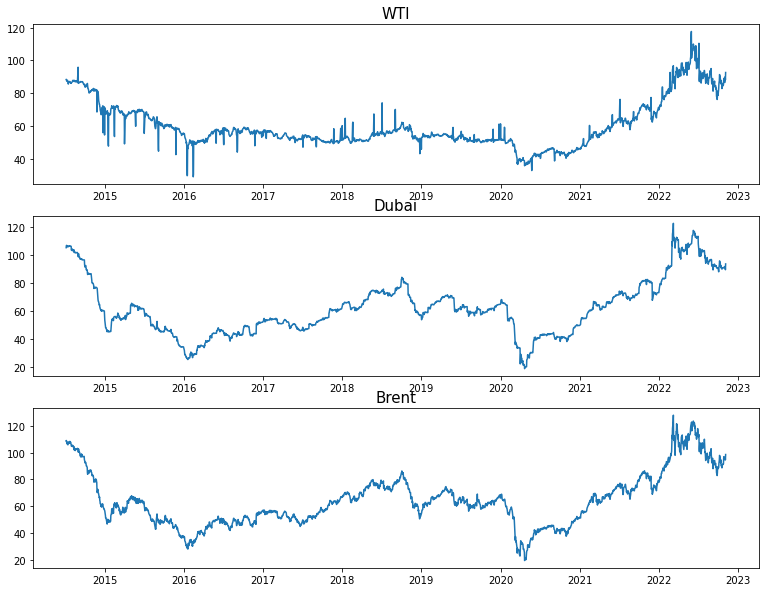

In [14]:
# 원유 3종 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
for i,j in zip(range(1,4), oil_list):
  plt.subplot(3,1,i)
  plt.title("%s" % oil_list_names[i-1], size = 15)
  plt.plot(j)


In [15]:
# 가중치 계산식에 맞게 기준유가 변수 정의

oil_price = 0.8 * dubai + 0.15 * brent + 0.05 * wti

In [16]:
oil_price

,Close
Date,
2014-07-08,104.9190
2014-07-09,105.9095
2014-07-10,106.1725
2014-07-11,104.9950
2014-07-14,105.3960
...,...
2022-10-31,91.4550
2022-11-01,91.5920
2022-11-02,92.4200


In [17]:
oil_price[oil_price['Close'].isnull()].head(10)

,Close
Date,
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN
2015-01-18,NaN
2015-01-19,NaN
2015-02-15,NaN
2015-02-16,NaN
2015-04-03,NaN


In [18]:
oil_price.isnull().sum()

Close    102
dtype: int64

In [19]:
# 결측치 제거
oil_price.dropna(axis=0, inplace=True)

In [20]:
oil_price

,Close
Date,
2014-07-08,104.9190
2014-07-09,105.9095
2014-07-10,106.1725
2014-07-11,104.9950
2014-07-14,105.3960
...,...
2022-10-31,91.4550
2022-11-01,91.5920
2022-11-02,92.4200


Text(0, 0.5, 'Oil Price')

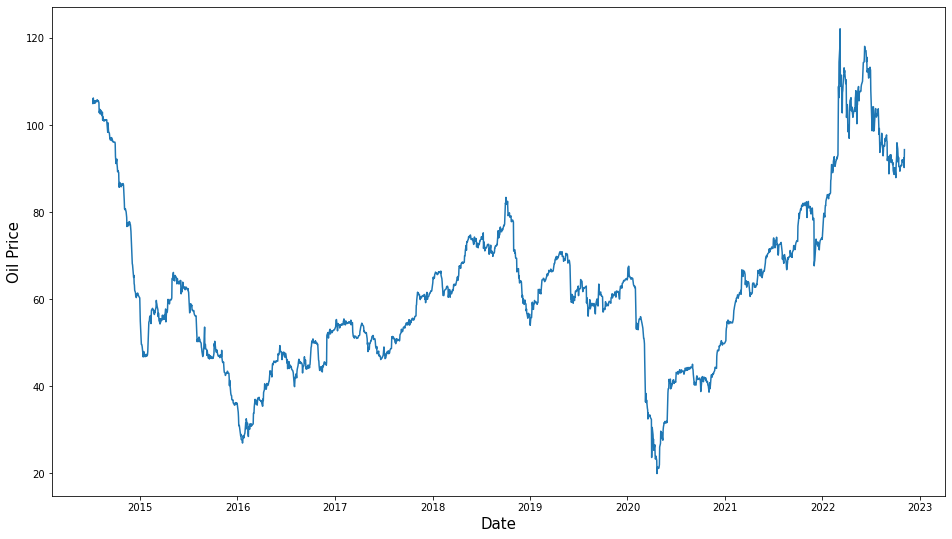

In [21]:
# 기준유가 시각화

plt.figure(figsize=(16,9))
plt.plot(oil_price)
plt.xlabel('Date', size = 15)
plt.ylabel('Oil Price', size = 15)

### S&P 500

In [22]:
df_SP500 = fdr.DataReader('US500', '2014-07-08')

In [23]:
df_SP500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-08,1976.390015,1976.390015,1959.459961,1963.709961,1963.709961,3302430000
2014-07-09,1965.099976,1974.150024,1965.099976,1972.829956,1972.829956,2858800000
2014-07-10,1966.670044,1969.839966,1952.859985,1964.680054,1964.680054,3165690000
2014-07-11,1965.760010,1968.670044,1959.630005,1967.569946,1967.569946,2684630000
2014-07-14,1969.859985,1979.849976,1969.859985,1977.099976,1977.099976,2744920000
...,...,...,...,...,...,...
2022-11-03,3733.250000,3750.590088,3698.149902,3719.889893,3719.889893,4625290000
2022-11-04,3766.979980,3796.340088,3708.840088,3770.550049,3770.550049,0
2022-11-07,3780.709961,3813.949951,3764.699951,3806.800049,3806.800049,4341620000


In [24]:
df_SP500.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
df_SP500.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
df_SP500.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df_SP500

,Close
Date,
2014-07-08,1963.709961
2014-07-09,1972.829956
2014-07-10,1964.680054
2014-07-11,1967.569946
2014-07-14,1977.099976
...,...
2022-11-03,3719.889893
2022-11-04,3770.550049
2022-11-07,3806.800049


### USD/KRW 환율

In [27]:
df_USD = fdr.DataReader('USD/KRW', start = '2014-07-08')

In [28]:
df_USD

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-08,1010.599976,1011.500000,1008.950012,1010.599976,1010.599976,0.0
2014-07-09,1010.599976,1011.900024,1010.000000,1010.799988,1010.799988,0.0
2014-07-10,1008.500000,1012.700012,1008.500000,1011.000000,1011.000000,0.0
2014-07-11,1012.299988,1019.500000,1012.299988,1012.200012,1012.200012,0.0
2014-07-14,1017.049988,1019.429993,1016.000000,1018.500000,1018.500000,0.0
...,...,...,...,...,...,...
2022-11-03,1423.099976,1427.949951,1417.089966,1423.099976,1423.099976,0.0
2022-11-04,1423.650024,1428.939941,1404.010010,1423.650024,1423.650024,0.0
2022-11-07,1402.109985,1412.069946,1389.410034,1402.109985,1402.109985,0.0


In [29]:
df_USD.isnull().sum()

Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [30]:
df_USD[ df_USD['Close'].isnull() ]    # 결측치 자리 찾기

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-11,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-22,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_USD.dropna(axis=0, inplace=True)   #결측치 제외하기

In [32]:
df_USD.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
df_USD.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df_USD

,Close
Date,
2014-07-08,1010.599976
2014-07-09,1010.799988
2014-07-10,1011.000000
2014-07-11,1012.200012
2014-07-14,1018.500000
...,...
2022-11-03,1423.099976
2022-11-04,1423.650024
2022-11-07,1402.109985


### 다우존스

In [34]:
#다우존스 가격
df_DJI = fdr.DataReader('DJI', start  = '2014-07-08')

In [35]:
df_DJI

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-08,17022.089844,17022.089844,16874.789063,16906.619141,16906.619141,75250000
2014-07-09,16916.830078,16998.949219,16913.810547,16985.609375,16985.609375,67120000
2014-07-10,16980.349609,16980.349609,16805.380859,16915.070313,16915.070313,67510000
2014-07-11,16918.310547,16949.460938,16860.300781,16943.810547,16943.810547,61000000
2014-07-14,16950.929688,17088.429688,16950.929688,17055.419922,17055.419922,60570000
...,...,...,...,...,...,...
2022-11-03,31985.050781,32185.710938,31727.050781,32001.250000,32001.250000,354440000
2022-11-04,32265.009766,32611.519531,31938.919922,32403.220703,32403.220703,422370000
2022-11-07,32454.099609,32895.589844,32424.990234,32827.000000,32827.000000,336300000


In [36]:
df_DJI.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
df_DJI.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df_DJI

,Close
Date,
2014-07-08,16906.619141
2014-07-09,16985.609375
2014-07-10,16915.070313
2014-07-11,16943.810547
2014-07-14,17055.419922
...,...
2022-11-03,32001.250000
2022-11-04,32403.220703
2022-11-07,32827.000000


### **TARGET DATA** 항공업 주가 데이터
- 항공사 전반적 추세 확인 위해 전체 항공 여객 운송업 데이터 이용
- 문제점: 에어부산의 가장 최신 데이터가 2018년 12월 27일이라 그때부터의 데이터를 합함

**항공 여객 운송업 종목 모으기**

finance data reader 데이터가 변경되기 전 (2022.10.10 기준),

"항공 여객 운송업" 부문 코드 찾은 내용

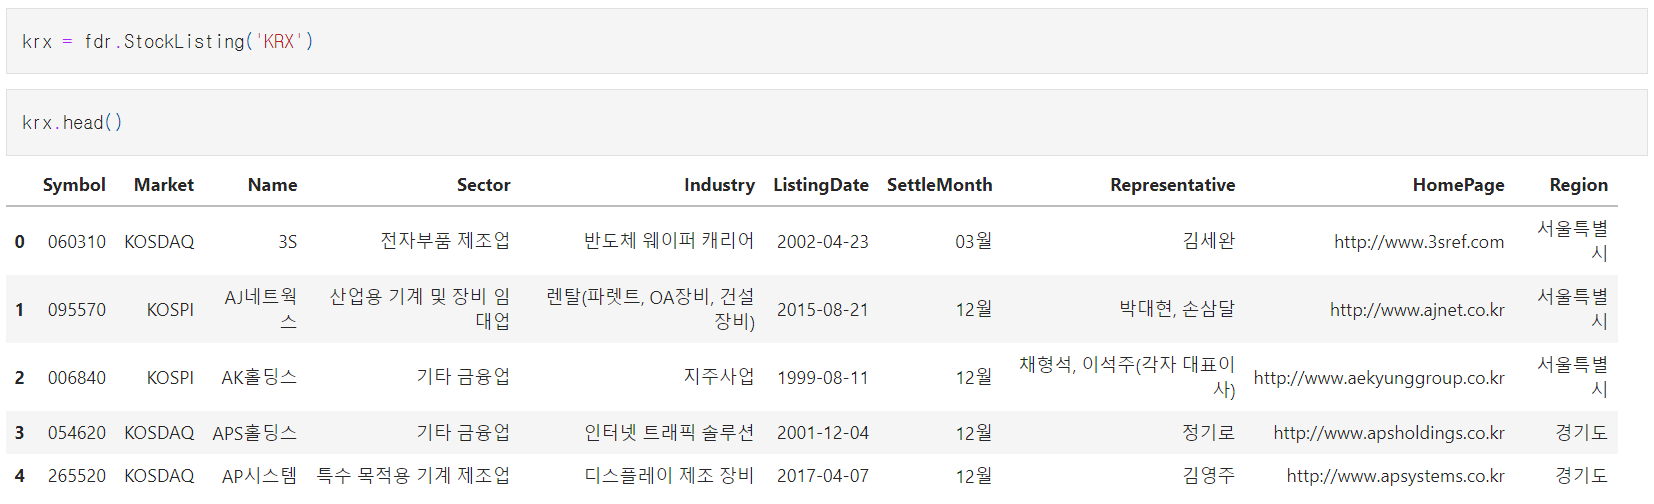

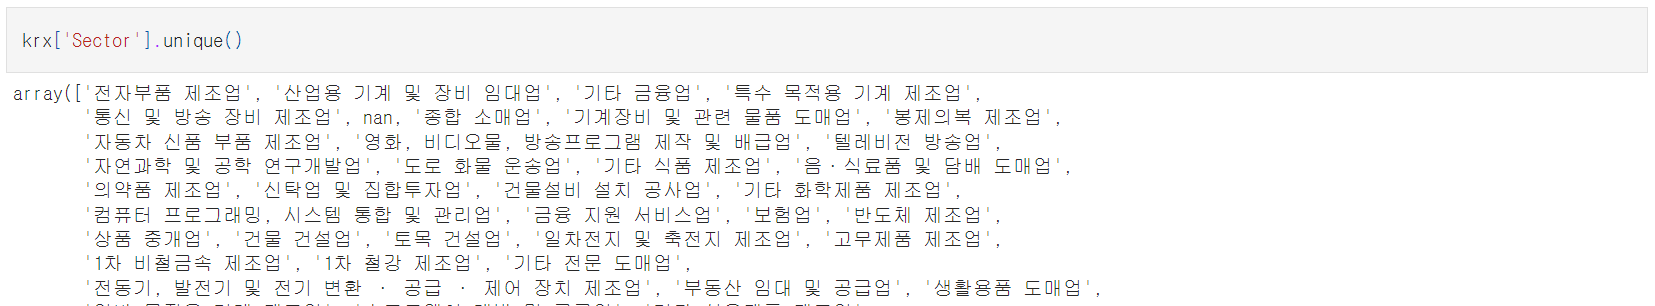

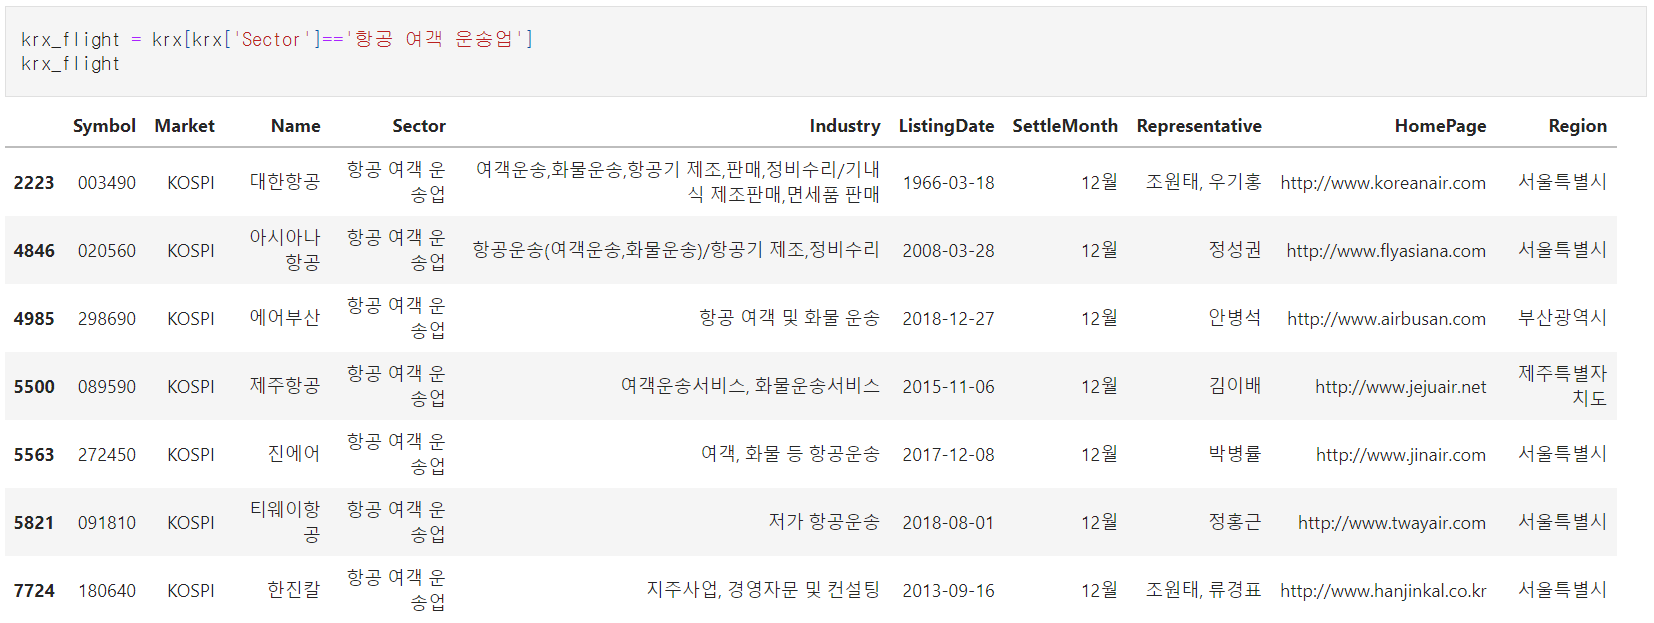

위에서 찾은 Symbol을 토대로 현재 변경된 (2022-10-31 기준) 데이터에서 항공 여객 운송업 부문 추출

In [38]:
# 위와 같은 데이터 사용
# !pip install -U finance-datareader

In [39]:
krx = fdr.StockListing('KRX')

In [40]:
krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,62000,1,200,0.32,62000,62200,61300,14045592,869644724000,370126518100000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,599000,1,11000,1.87,591000,599000,581000,304293,180166426000,140166000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,89200,1,1500,1.71,88100,89200,86600,2619752,231597454400,64937810958000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,895000,2,-5000,-0.56,900000,904000,890000,64670,57965269000,63700730000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,738000,1,8000,1.10,730000,738000,723000,210001,153970468544,50748223140000,68764530,STK


In [41]:
krair = fdr.DataReader('003490')
asair = fdr.DataReader('020560')
buair = fdr.DataReader('298690')
jejuair = fdr.DataReader('089590')
jinair = fdr.DataReader('272450')
twair = fdr.DataReader('091810')
hjkair = fdr.DataReader('180640')

In [42]:
asair.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [43]:
list = [krair,asair,buair,jejuair,jinair,twair,hjkair]
for i in list:
    i.drop(['Open', 'Change'],axis=1,inplace=True)

In [44]:
# 항공사 모은 변수 aviation 정의
aviation = krair + asair + hjkair

In [45]:
# 에어부산 데이터 이전인 2018-12-26까지만 결측치, 이후에는 결측치 없는 것 확인

aviation[ aviation['Close'].isnull() ].tail(10)

,High,Low,Close,Volume
Date,,,,
2013-09-02,NaN,NaN,NaN,NaN
2013-09-03,NaN,NaN,NaN,NaN
2013-09-04,NaN,NaN,NaN,NaN
2013-09-05,NaN,NaN,NaN,NaN
2013-09-06,NaN,NaN,NaN,NaN
2013-09-09,NaN,NaN,NaN,NaN
2013-09-10,NaN,NaN,NaN,NaN
2013-09-11,NaN,NaN,NaN,NaN
2013-09-12,NaN,NaN,NaN,NaN


In [46]:
# 따라서 전체 항공사 주가 중 2018-12-27 자료만 사용
aviation = aviation['2014-07-08':]

In [47]:
aviation

,High,Low,Close,Volume
Date,,,,
2014-07-08,68542.0,66916.0,67717.0,567084.0
2014-07-09,67726.0,66316.0,66735.0,503808.0
2014-07-10,67606.0,66290.0,66518.0,445014.0
2014-07-11,66970.0,65368.0,66457.0,592197.0
2014-07-14,67103.0,65675.0,66715.0,432604.0
...,...,...,...,...
2022-11-03,74650.0,71800.0,73700.0,1678209.0
2022-11-04,76800.0,73800.0,75650.0,3763090.0
2022-11-07,77100.0,74950.0,76200.0,1837832.0


In [48]:
aviation.isnull().sum() # 마지막으로 결측치 없는 것 확인

High      0
Low       0
Close     0
Volume    0
dtype: int64

In [49]:
aviation.columns

Index(['High', 'Low', 'Close', 'Volume'], dtype='object')

In [50]:
aviation = aviation[['Close', 'High', 'Low', 'Volume']]
aviation

,Close,High,Low,Volume
Date,,,,
2014-07-08,67717.0,68542.0,66916.0,567084.0
2014-07-09,66735.0,67726.0,66316.0,503808.0
2014-07-10,66518.0,67606.0,66290.0,445014.0
2014-07-11,66457.0,66970.0,65368.0,592197.0
2014-07-14,66715.0,67103.0,65675.0,432604.0
...,...,...,...,...
2022-11-03,73700.0,74650.0,71800.0,1678209.0
2022-11-04,75650.0,76800.0,73800.0,3763090.0
2022-11-07,76200.0,77100.0,74950.0,1837832.0


# 2.데이터셋 필요한 형태로 만들기 (df_close)
: **날짜(Date), 변수 별 종가(close)** 데이터

Date / SP500 close / WTI close / USD close / DJI close

In [51]:
import pandas as pd

In [52]:
dfs = [aviation, oil_price, df_SP500, df_USD, df_DJI]

In [53]:
names = ['AVIATION', 'High', 'Low', 'Volume', 'OIL PRICE', 'SP500', 'USD', 'DJI']

In [54]:
df_close = pd.concat([aviation, oil_price, df_SP500, df_USD, df_DJI], axis=1)
df_close

,Close,High,Low,Volume,Close,Close,Close,Close
Date,,,,,,,,
2014-07-08,67717.0,68542.0,66916.0,567084.0,104.9190,1963.709961,1010.599976,16906.619141
2014-07-09,66735.0,67726.0,66316.0,503808.0,105.9095,1972.829956,1010.799988,16985.609375
2014-07-10,66518.0,67606.0,66290.0,445014.0,106.1725,1964.680054,1011.000000,16915.070313
2014-07-11,66457.0,66970.0,65368.0,592197.0,104.9950,1967.569946,1012.200012,16943.810547
2014-07-14,66715.0,67103.0,65675.0,432604.0,105.3960,1977.099976,1018.500000,17055.419922
...,...,...,...,...,...,...,...,...
2022-11-03,73700.0,74650.0,71800.0,1678209.0,90.2090,3719.889893,1423.099976,32001.250000
2022-11-04,75650.0,76800.0,73800.0,3763090.0,94.3200,3770.550049,1423.650024,32403.220703
2022-11-07,76200.0,77100.0,74950.0,1837832.0,NaN,3806.800049,1402.109985,32827.000000


In [55]:
df_close.columns = names
df_close

,AVIATION,High,Low,Volume,OIL PRICE,SP500,USD,DJI
Date,,,,,,,,
2014-07-08,67717.0,68542.0,66916.0,567084.0,104.9190,1963.709961,1010.599976,16906.619141
2014-07-09,66735.0,67726.0,66316.0,503808.0,105.9095,1972.829956,1010.799988,16985.609375
2014-07-10,66518.0,67606.0,66290.0,445014.0,106.1725,1964.680054,1011.000000,16915.070313
2014-07-11,66457.0,66970.0,65368.0,592197.0,104.9950,1967.569946,1012.200012,16943.810547
2014-07-14,66715.0,67103.0,65675.0,432604.0,105.3960,1977.099976,1018.500000,17055.419922
...,...,...,...,...,...,...,...,...
2022-11-03,73700.0,74650.0,71800.0,1678209.0,90.2090,3719.889893,1423.099976,32001.250000
2022-11-04,75650.0,76800.0,73800.0,3763090.0,94.3200,3770.550049,1423.650024,32403.220703
2022-11-07,76200.0,77100.0,74950.0,1837832.0,NaN,3806.800049,1402.109985,32827.000000


In [56]:
# 결측치 있는 행 모아보기
df_close[df_close['AVIATION'].isnull() | df_close['OIL PRICE'].isnull() | df_close['SP500'].isnull() | df_close['USD'].isnull() | df_close['DJI'].isnull()]

,AVIATION,High,Low,Volume,OIL PRICE,SP500,USD,DJI
Date,,,,,,,,
2014-08-15,NaN,NaN,NaN,NaN,101.8540,1955.060059,1020.200012,16662.910156
2014-09-01,69662.0,70446.0,68680.0,955918.0,NaN,NaN,1013.599976,NaN
2014-09-08,NaN,NaN,NaN,NaN,98.1090,2001.540039,1023.500000,17111.419922
2014-09-09,NaN,NaN,NaN,NaN,97.6000,1988.439941,1023.500000,17013.869141
2014-09-10,NaN,NaN,NaN,NaN,96.8285,1995.689941,1033.500000,17068.710938
...,...,...,...,...,...,...,...,...
2022-10-03,NaN,NaN,NaN,NaN,87.8880,3678.429932,1439.229980,29490.890625
2022-10-10,NaN,NaN,NaN,NaN,94.4565,3612.389893,1415.979980,29202.880859
2022-11-07,76200.0,77100.0,74950.0,1837832.0,NaN,3806.800049,1402.109985,32827.000000


In [57]:
# 결측치 제거
df_close.dropna(axis = 0, inplace = True)

In [58]:
df_close

,AVIATION,High,Low,Volume,OIL PRICE,SP500,USD,DJI
Date,,,,,,,,
2014-07-08,67717.0,68542.0,66916.0,567084.0,104.9190,1963.709961,1010.599976,16906.619141
2014-07-09,66735.0,67726.0,66316.0,503808.0,105.9095,1972.829956,1010.799988,16985.609375
2014-07-10,66518.0,67606.0,66290.0,445014.0,106.1725,1964.680054,1011.000000,16915.070313
2014-07-11,66457.0,66970.0,65368.0,592197.0,104.9950,1967.569946,1012.200012,16943.810547
2014-07-14,66715.0,67103.0,65675.0,432604.0,105.3960,1977.099976,1018.500000,17055.419922
...,...,...,...,...,...,...,...,...
2022-10-31,73250.0,75650.0,72100.0,2844291.0,91.4550,3871.979980,1421.650024,32732.949219
2022-11-01,74350.0,75100.0,72450.0,1583903.0,91.5920,3856.100098,1424.670044,32653.199219
2022-11-02,74300.0,75250.0,72750.0,1887380.0,92.4200,3759.689941,1416.599976,32147.759766


In [59]:
df_close.isnull().sum()

AVIATION     0
High         0
Low          0
Volume       0
OIL PRICE    0
SP500        0
USD          0
DJI          0
dtype: int64

# 3.데이터 시각화해서 확인

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

Text(0, 0.5, 'price')

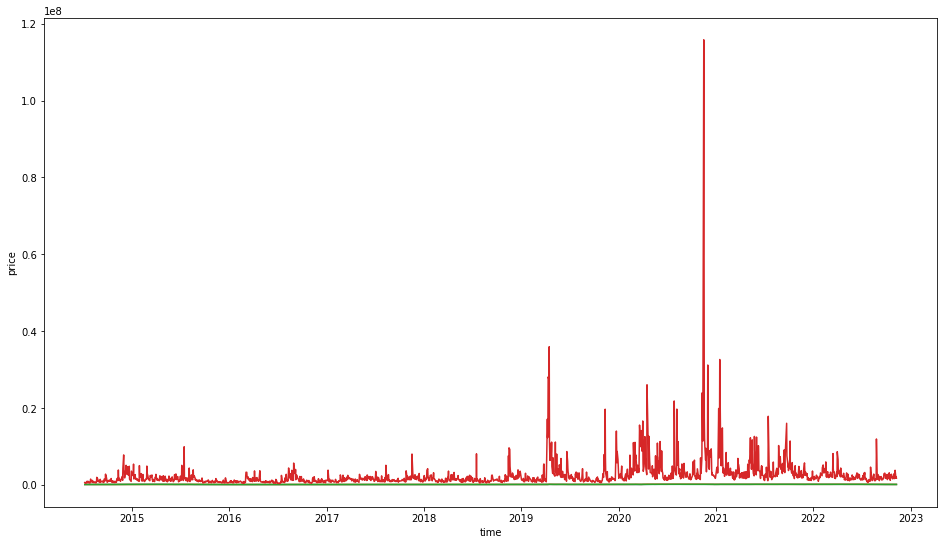

In [61]:
# 타겟변수 항공사 주가: aviation
plt.figure(figsize=(16,9))
plt.plot(aviation)
plt.xlabel('time')
plt.ylabel('price')

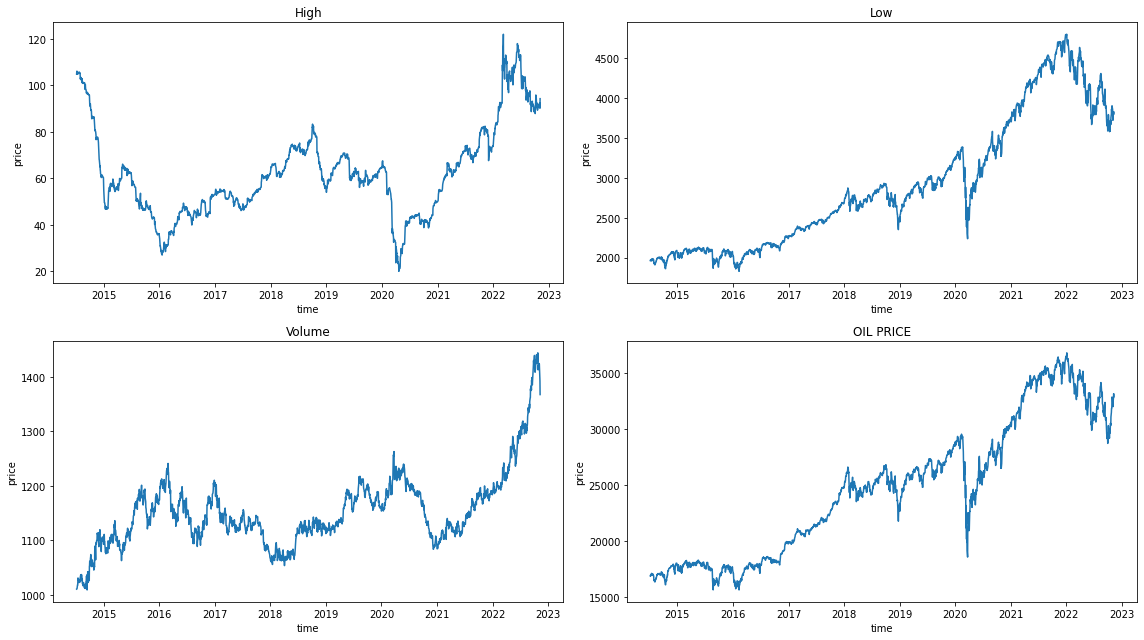

In [62]:
# 네 개의 데이터 한 번에 그려보기

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)


## 데이터셋 필요한 형태로 만들기에서 정의한 dfs, names 리스트 사용
for i in range( 4 ):
    ax = axes[i//2, i%2]
    sns.lineplot(y = dfs[i+1]['Close'], x = dfs[i+1].index, ax = ax)
    ax.set_title('%s' % names[i+1])
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [63]:
# 변수간 상관관계 확인
## table
df_close.corr()

,AVIATION,High,Low,Volume,OIL PRICE,SP500,USD,DJI
AVIATION,1.000000,0.986672,0.988056,0.352293,0.164225,0.701502,0.214516,0.644949
High,0.986672,1.000000,0.993931,0.385078,0.144616,0.674404,0.236618,0.618267
Low,0.988056,0.993931,1.000000,0.320167,0.173003,0.693411,0.230639,0.635487
Volume,0.352293,0.385078,0.320167,1.000000,-0.077895,0.214412,0.030192,0.215306
OIL PRICE,0.164225,0.144616,0.173003,-0.077895,1.000000,0.464986,0.154174,0.460694
SP500,0.701502,0.674404,0.693411,0.214412,0.464986,1.000000,0.414149,0.983445
USD,0.214516,0.236618,0.230639,0.030192,0.154174,0.414149,1.000000,0.377732
DJI,0.644949,0.618267,0.635487,0.215306,0.460694,0.983445,0.377732,1.000000


<Figure size 1080x1080 with 0 Axes>

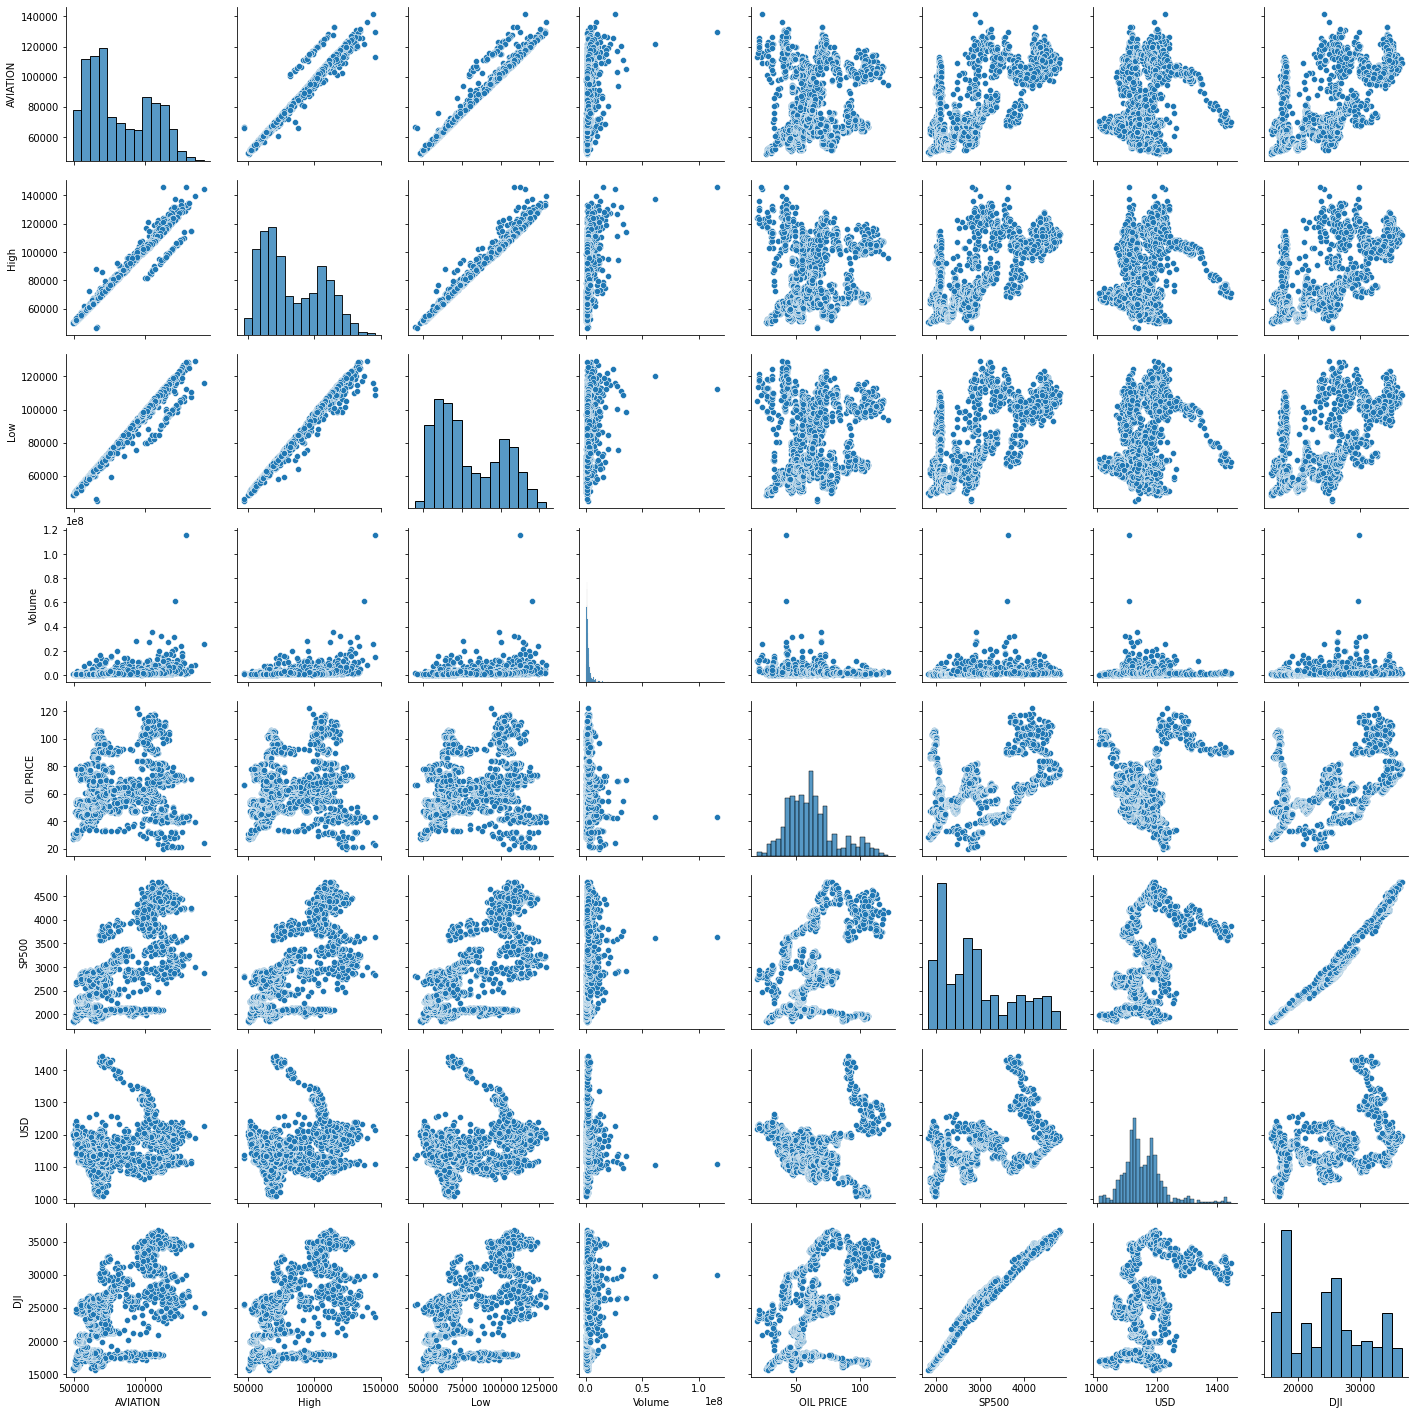

In [64]:
## 시각화
plt.figure(figsize=(15,15))
sns.pairplot(df_close)

선형 상관관계 찾을 수 없음

-> 선형 회귀분석 불가

-> LSTM 사용

# 4.데이터 전처리 (s_df_close)

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니, 참고해 보시기 바랍니다.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
df_close.head()

,AVIATION,High,Low,Volume,OIL PRICE,SP500,USD,DJI
Date,,,,,,,,
2014-07-08,67717.0,68542.0,66916.0,567084.0,104.9190,1963.709961,1010.599976,16906.619141
2014-07-09,66735.0,67726.0,66316.0,503808.0,105.9095,1972.829956,1010.799988,16985.609375
2014-07-10,66518.0,67606.0,66290.0,445014.0,106.1725,1964.680054,1011.000000,16915.070313
2014-07-11,66457.0,66970.0,65368.0,592197.0,104.9950,1967.569946,1012.200012,16943.810547
2014-07-14,66715.0,67103.0,65675.0,432604.0,105.3960,1977.099976,1018.500000,17055.419922


In [67]:
scaler = MinMaxScaler()

# 데이터셋 필요한 형태로 만들기에서 정의한 리스트 names 사용
scale_cols = names
scaled = scaler.fit_transform(df_close[scale_cols])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 유지했습니다.

*916개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [68]:
# Scaled DataFrame - 'CLOSE' column only
s_df_close = pd.DataFrame(scaled, columns = names, 
                          index = df_close.index)   # 인덱스 여기서 추가

In [69]:
s_df_close

,AVIATION,High,Low,Volume,OIL PRICE,SP500,USD,DJI
Date,,,,,,,,
2014-07-08,0.202967,0.219899,0.263102,0.002495,0.832143,0.045368,0.003449,0.058963
2014-07-09,0.192417,0.211623,0.256013,0.001948,0.841843,0.048442,0.003909,0.062699
2014-07-10,0.190086,0.210406,0.255706,0.001439,0.844419,0.045695,0.004369,0.059362
2014-07-11,0.189430,0.203955,0.244814,0.002713,0.832888,0.046669,0.007129,0.060722
2014-07-14,0.192202,0.205304,0.248441,0.001332,0.836815,0.049881,0.021616,0.066002
...,...,...,...,...,...,...,...,...
2022-10-31,0.262411,0.291988,0.324347,0.022203,0.700291,0.688429,0.948696,0.807625
2022-11-01,0.274229,0.286410,0.328482,0.011295,0.701632,0.683078,0.955641,0.803853
2022-11-02,0.273692,0.287931,0.332026,0.013922,0.709741,0.650589,0.937083,0.779943


# 5.데이터셋 train / test 분할

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_test, y_train, y_test = train_test_split(s_df_close.drop('AVIATION', 1), # '여타 특성값들(독립변수들)'
                                                    s_df_close['AVIATION'],   # '예측하고 싶은 타겟(종속변수)'
                                                    test_size=0.2, 
                                                    random_state=0, shuffle=False)

In [72]:
# train dataset 학습용 데이터
x_train.shape, y_train.shape

((1584, 7), (1584,))

In [73]:
# test dataset 검증용 데이터
x_test.shape, y_test.shape

((397, 7), (397,))

In [74]:
x_train

,High,Low,Volume,OIL PRICE,SP500,USD,DJI
Date,,,,,,,
2014-07-08,0.219899,0.263102,0.002495,0.832143,0.045368,0.003449,0.058963
2014-07-09,0.211623,0.256013,0.001948,0.841843,0.048442,0.003909,0.062699
2014-07-10,0.210406,0.255706,0.001439,0.844419,0.045695,0.004369,0.059362
2014-07-11,0.203955,0.244814,0.002713,0.832888,0.046669,0.007129,0.060722
2014-07-14,0.205304,0.248441,0.001332,0.836815,0.049881,0.021616,0.066002
...,...,...,...,...,...,...,...
2021-03-04,0.592961,0.689830,0.013771,0.437222,0.653548,0.276871,0.722060
2021-03-05,0.580619,0.677425,0.011972,0.458189,0.678306,0.285724,0.749126
2021-03-08,0.584391,0.670467,0.026443,0.448127,0.671368,0.272249,0.763608


# 6.TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [75]:
import tensorflow as tf

In [76]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

Hyperparameter를 정의합니다.

- WINDOW_SIZE = 20 : 과거 20일을 기반으로 그 다음 날의 데이터를 예측

In [77]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [78]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [79]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


# 7.모델

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### 최적화: filters = 16 모델

In [112]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters = 16, kernel_size = 5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [113]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [114]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [115]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     42/Unknown - 2s 6ms/step - loss: 0.0404 - mse: 0.0807
Epoch 1: val_loss improved from inf to 0.03335, saving model to tmp/ckeckpointer.ckpt
49/49 [==============================] - 3s 19ms/step - loss: 0.0379 - mse: 0.0758 - val_loss: 0.0333 - val_mse: 0.0667
Epoch 2/50
44/49 [=========================>....] - ETA: 0s - loss: 0.0066 - mse: 0.0132
Epoch 2: val_loss improved from 0.03335 to 0.00321, saving model to tmp/ckeckpointer.ckpt
49/49 [==============================] - 0s 8ms/step - loss: 0.0064 - mse: 0.0127 - val_loss: 0.0032 - val_mse: 0.0064
Epoch 3/50
44/49 [=========================>....] - ETA: 0s - loss: 0.0026 - mse: 0.0051
Epoch 3: val_loss improved from 0.00321 to 0.00160, saving model to tmp/ckeckpointer.ckpt
49/49 [==============================] - 0s 8ms/step - loss: 0.0025 - mse: 0.0049 - val_loss: 0.0016 - val_mse: 0.0032
Epoch 4/50
44/49 [=========================>....] - ETA: 0s - loss: 0.0015 - mse: 0.0030
Epoch 4: val_loss improved from 0.00160

저장한 ModelCheckpoint 를 로드합니다.

In [116]:
model.load_weights(filename)

`test_data`를 활용하여 예측을 진행합니다.

In [117]:
# pred 변수에 예측값 저장
pred = model.predict(test_data)

12/12 [==============================] - 0s 7ms/step


In [118]:
pred.shape

(377, 1)

### 최적화: filters = 32 모델

In [88]:

model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters = 32, kernel_size = 5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [89]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [90]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [91]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     44/Unknown - 2s 6ms/step - loss: 0.0272 - mse: 0.0544
Epoch 1: val_loss improved from inf to 0.00250, saving model to tmp/ckeckpointer.ckpt
49/49 [==============================] - 3s 19ms/step - loss: 0.0252 - mse: 0.0503 - val_loss: 0.0025 - val_mse: 0.0050
Epoch 2/50
46/49 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0074
Epoch 2: val_loss improved from 0.00250 to 0.00165, saving model to tmp/ckeckpointer.ckpt
49/49 [==============================] - 1s 10ms/step - loss: 0.0036 - mse: 0.0073 - val_loss: 0.0016 - val_mse: 0.0033
Epoch 3/50
46/49 [===========================>..] - ETA: 0s - loss: 0.0016 - mse: 0.0032
Epoch 3: val_loss improved from 0.00165 to 0.00154, saving model to tmp/ckeckpointer.ckpt
49/49 [==============================] - 0s 8ms/step - loss: 0.0017 - mse: 0.0033 - val_loss: 0.0015 - val_mse: 0.0031
Epoch 4/50
40/49 [=======================>......] - ETA: 0s - loss: 0.0014 - mse: 0.0029
Epoch 4: val_loss improved from 0.0015

저장한 ModelCheckpoint 를 로드합니다.

In [92]:
model.load_weights(filename)

`test_data`를 활용하여 예측을 진행합니다.

In [93]:
pred = model.predict(test_data)

12/12 [==============================] - 0s 6ms/step


In [94]:
pred.shape

(377, 1)

# 8.예측 데이터 시각화

## Re-Scaling & Date Indexing 
: 단위 되돌리고 날짜 인덱스 다시 추가

In [119]:
names

['AVIATION', 'High', 'Low', 'Volume', 'OIL PRICE', 'SP500', 'USD', 'DJI']

### 검증용 데이터 rescaling
y_test >> y_test_rescale

In [120]:
y_test

Date
2021-03-11    0.575995
2021-03-12    0.588608
2021-03-15    0.592239
2021-03-16    0.618550
2021-03-17    0.620473
                ...   
2022-10-31    0.262411
2022-11-01    0.274229
2022-11-02    0.273692
2022-11-03    0.267246
2022-11-04    0.288196
Name: AVIATION, Length: 397, dtype: float64

In [121]:
y_test_df = pd.DataFrame(y_test)

for i in range(len(names)):
  if i > 0:
    y_test_df[names[i]] = 0
y_test_df

,AVIATION,High,Low,Volume,OIL PRICE,SP500,USD,DJI
Date,,,,,,,,
2021-03-11,0.575995,0,0,0,0,0,0,0
2021-03-12,0.588608,0,0,0,0,0,0,0
2021-03-15,0.592239,0,0,0,0,0,0,0
2021-03-16,0.618550,0,0,0,0,0,0,0
2021-03-17,0.620473,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-10-31,0.262411,0,0,0,0,0,0,0
2022-11-01,0.274229,0,0,0,0,0,0,0
2022-11-02,0.273692,0,0,0,0,0,0,0


In [122]:
y_test_rescale = scaler.inverse_transform(y_test_df)
y_test_rescale = pd.DataFrame(y_test_rescale)

In [123]:
y_test_rescale

,0,1,2,3,4,5,6,7
0,102438.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
1,103612.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
2,103950.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
3,106399.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
4,106578.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
...,...,...,...,...,...,...,...,...
392,73250.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
393,74350.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
394,74300.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
395,73700.0,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688


### 예측값 데이터 rescaling
pred >> pred_rescale

In [124]:
pred_df = pd.DataFrame(pred)
for i in range(len(names)):
  if i > 0:
    pred_df[names[i]] = 0

In [125]:
pred_df

,0,High,Low,Volume,OIL PRICE,SP500,USD,DJI
0,0.506560,0,0,0,0,0,0,0
1,0.516507,0,0,0,0,0,0,0
2,0.520446,0,0,0,0,0,0,0
3,0.531067,0,0,0,0,0,0,0
4,0.534390,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
372,0.277080,0,0,0,0,0,0,0
373,0.274557,0,0,0,0,0,0,0
374,0.274985,0,0,0,0,0,0,0
375,0.274175,0,0,0,0,0,0,0


In [126]:
pred_rescale = scaler.inverse_transform(pred_df)
pred_rescale = pd.DataFrame(pred_rescale)

In [127]:
pred_rescale

,0,1,2,3,4,5,6,7
0,95975.073069,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
1,96900.991090,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
2,97267.621205,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
3,98256.175476,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
4,98565.445432,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
...,...,...,...,...,...,...,...,...
372,74615.348686,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
373,74380.457198,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
374,74420.327474,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688
375,74344.961473,46860.0,44646.0,278740.0,19.9455,1829.079956,1009.099976,15660.179688




---


아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

### 검증용 데이터 + DateTime Index
y_test_rescale >> y_test_graph

In [128]:
# y_test_graph: y_test_rescale[21:]의 인덱스에 Date time 추가

y_test_graph = y_test_rescale[0][21:]
y_test_graph = pd.DataFrame(y_test_graph)
y_test_graph.set_index(y_test_df[21:].index, inplace=True)
y_test_graph

,0
Date,
2021-04-12,96933.0
2021-04-13,98338.0
2021-04-14,98212.0
2021-04-15,98006.0
2021-04-16,98000.0
...,...
2022-10-31,73250.0
2022-11-01,74350.0
2022-11-02,74300.0


### 예측값 데이터 + DateTime Index
pred_rescale >> pred_graph

In [129]:
# pred_graph: pred_rescale[:-1]의 인덱스에 Date time 추가

pred_graph = pred_rescale[0][:-1]
pred_graph = pd.DataFrame(pred_graph)
pred_graph.set_index(y_test_df[21:].index, inplace=True)
pred_graph

,0
Date,
2021-04-12,95975.073069
2021-04-13,96900.991090
2021-04-14,97267.621205
2021-04-15,98256.175476
2021-04-16,98565.445432
...,...
2022-10-31,73120.139824
2022-11-01,74615.348686
2022-11-02,74380.457198


## 시각화

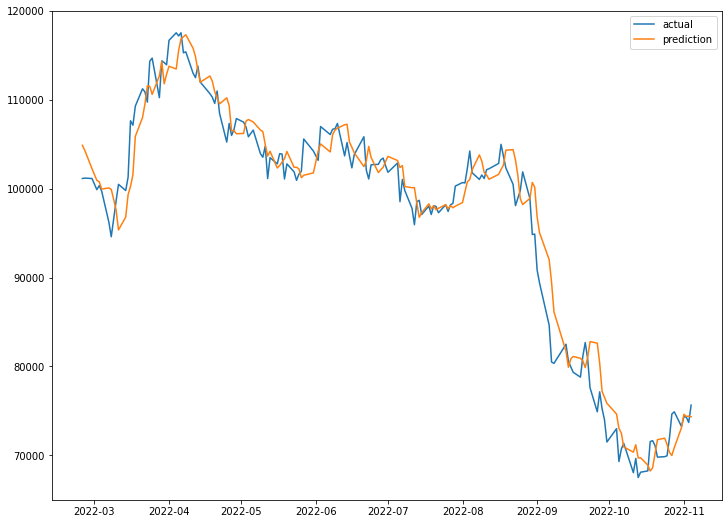

In [130]:
# 시각화

plt.figure(figsize=(12, 9))
plt.plot(y_test_graph['2022-02-24':], label='actual')
plt.plot(pred_graph['2022-02-24':], label='prediction')
plt.legend()
plt.show()

In [131]:
# 예측한 다음날(2022-10-28) 값
pred_graph[0][-1:]

Date
2022-11-04    74344.961473
Name: 0, dtype: float64

In [132]:
#16
print(' "예측 결과, %s 다음날의 가격은 %.2f(원)입니다." ' % ( str( pred_graph.index[-1] ), pred_graph.iat[-1, 0] ) )

 "예측 결과, 2022-11-04 00:00:00 다음날의 가격은 74344.96(원)입니다." 


In [133]:
#32
print(' "예측 결과, %s 다음날의 가격은 %.2f(원)입니다." ' % ( str( pred_graph.index[-1] ), pred_graph.iat[-1, 0] ) )

 "예측 결과, 2022-11-04 00:00:00 다음날의 가격은 74344.96(원)입니다." 


## 변수는 주가와 관련된 변수 추가를 해주고 데이터 양을 늘림
- 원래는 퇴고 대장 3개만하고 2013년부터의 데이터를 모음
- 근데 두바이유가 2014년부터 시작하여 여기에 맞춰서 데이터를 줄임
- 결과: 데이터가 